# Clinica and ClinicaDL

This notebook aims at presenting the softwares [Clinica](https://www.clinica.run) and [ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) and showing through very simple examples how they can help running neuroscience experiments.

## What are Clinica and ClinicaDL in two words ?

<img src="https://repository-images.githubusercontent.com/187224566/bfeaac00-78cc-11e9-8583-c5909b6b8fcf" width="500" height="200" alt="clinica logo">

[Clinica](https://www.clinica.run) defines itself as a software platform for **clinical research** studies involving patients with **neurological and psychiatric diseases** and the acquistion of **multimodal data** (neuroimaging, clinical and cognitive evaluations, genetics...), most often with longitudinal follow-up.

[Clinica](https://www.clinica.run) is free and open source. It is written in Python and can be installed very easily on Linux and MacOS systems:

```bash
$ pip install clinica
```

<img src="https://aramislab.paris.inria.fr/clinicadl/tuto/2023/html/_images/ClinicaDL_banner.png" width="600" height="400" alt="clinicadl logo">

[ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) is an open-source **deep learning software for reproducible neuroimaging processing**, and it can be seen as the deep learning extension of [Clinica](https://www.clinica.run).

It is also free, open-source, and written in Python and can be installed in a very similar way:

```bash
$ pip install clinicadl
```

<img src="https://i1.rgstatic.net/ii/lab.file/AS%3A583111420203008%401516036004628_xl" width="600" height="300" alt="aramislab logo">

The development of [Clinica](https://www.clinica.run) and [ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) were initiated by the [ARAMIS Lab](https://www.aramislab.fr) at the [Paris Brain Institute](https://institutducerveau-icm.org). They are actively developed and maintained.

The combination of [ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) and [Clinica](https://www.clinica.run) allows performing an **end-to-end neuroimaging analysis, from the download of raw data sets to the interpretation of trained networks**, including neuroimaging preprocessing, quality check, label definition, architecture search, and network training and evaluation.

<img src="https://clinicadl.readthedocs.io/en/latest/images/schema_c_cdl.png" width="1000" height="400" alt="processing with clinica and clinicadl">

## Why is it useful ?

To understand why [Clinica](https://www.clinica.run) and [ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) could be useful, let's take a look at a very simple toy example.

The goal is to understand **how both of these tools simplify our workflow as we conduct a neuroimaging experiment**. We will compare how the different steps would look like without these tools and how simple they besome once you use them.

### Step 1: The input dataset

The first step in our example experiment is to download some data and use this dataset to feed our analysis.

#### The format issue

##### The lack of standard for raw datasets

Most of the time, the dataset you will download will be in **a form that is not handy for doing research**:

- Metadata are usually spread accross a large number of files in various format (CSV, XML, text...).
- Images are in a format called [DICOM](https://www.dicomstandard.org) which is the standard output format for scanners.
- Each dataset has its own organization conventions (the ADNI structure will be different from UKB's for instance).

Let's take a look at a very small sample from the [OASIS-1](https://www.oasis-brains.org) dataset which contains public data:

In [40]:
! dvc get https://github.com/aramis-lab/dataset-registry OASIS/sample

  0% Downloading sample|                             |0/1 [00:00<?,    ?files/s]
!
  0%|          |OASIS/sample/dataset.tar.gz        0.00/? [00:00<?,        ?B/s]
  0%|          |OASIS/sample/dataset.tar.gz     0.00/146M [00:00<?,        ?B/s]
  1%|          |OASIS/sample/dataset.tar.gz1.75M/146M [00:00<00:08,    18.0MB/s]
  2%|▏         |OASIS/sample/dataset.tar.gz3.56M/146M [00:00<00:08,    18.6MB/s]
  4%|▍         |OASIS/sample/dataset.tar.gz5.63M/146M [00:00<00:07,    19.9MB/s]
  5%|▌         |OASIS/sample/dataset.tar.gz7.85M/146M [00:00<00:06,    20.9MB/s]
  7%|▋         |OASIS/sample/dataset.tar.gz9.52M/146M [00:00<00:07,    19.7MB/s]
  8%|▊         |OASIS/sample/dataset.tar.gz11.0M/146M [00:00<00:07,    18.4MB/s]
  9%|▊         |OASIS/sample/dataset.tar.gz12.7M/146M [00:00<00:07,    17.8MB/s]
 10%|▉         |OASIS/sample/dataset.tar.gz14.5M/146M [00:00<00:07,    18.1MB/s]
 11%|█         |OASIS/sample/dataset.tar.gz16.3M/146M [00:00<00:07,    18.1MB/s]
 13%|█▎        |OASIS/samp

In [53]:
! tar -xzf sample/dataset.tar.gz
! mkdir data/raw
! mv unorganized/ data/raw
! mv clinical_data/ data/raw

mkdir: data: File exists
mkdir: data/raw: File exists


In [54]:
! tree data

data
└── raw
    ├── clinical_data
    │   └── oasis_cross-sectional.csv
    └── unorganized
        ├── OAS1_0001_MR1
        │   ├── FSL_SEG
        │   │   ├── OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg.hdr
        │   │   ├── OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg.img
        │   │   ├── OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg.txt
        │   │   └── OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif
        │   ├── OAS1_0001_MR1.txt
        │   ├── OAS1_0001_MR1.xml
        │   ├── PROCESSED
        │   │   └── MPRAGE
        │   │       ├── OAS1_0001_MR1_mpr_n4_anon.lst
        │   │       ├── OAS1_0001_MR1_mpr_n4_anon_atl.lst
        │   │       ├── SUBJ_111
        │   │       │   ├── OAS1_0001_MR1_mpr_n4_anon_sbj_111.hdr
        │   │       │   ├── OAS1_0001_MR1_mpr_n4_anon_sbj_111.img
        │   │       │   └── OAS1_0001_MR1_mpr_n4_anon_sbj_111_sag_88.gif
        │   │       └── T88_111
        │   │           ├── OAS1_0001_MR1_mpr_n4_an

This very small sample only contains data for four subjects with a single session for each and a single modality.

We can see that even such a simple dataset results in a lot of files.

In addition, it is not obvious, from that structure, what kind of data or modality we have.

For more complex downloads, the raw dataset can be extremely complex to navigate!

##### The BIDS format

<img src="https://upload.wikimedia.org/wikipedia/commons/d/de/BIDS_Logo.png" width="500" height="200" alt="BIDS logo">

Most of the time, researchers prefer to rely on **another way of representing a dataset called [BIDS](https://bids.neuroimaging.io)**. The main ideas of [BIDS](https://bids.neuroimaging.io) are:

- Propose a standard way of organizing and naming files.
- Images are in a much simpler format than [DICOM](https://www.dicomstandard.org) called [Nifti](https://brainder.org/2012/09/23/the-nifti-file-format/) (one file = one image).
- File names and paths provide most of the usual metadata required to perform classical query operations on a dataset.
- Additional metadata are stored in sidecar files with structured formats (TSV or JSON).

<img src="https://fw-heudiconv.readthedocs.io/en/latest/_images/dicom-reorganization-transparent-white_1000x477.png" alt="BIDS vs DICOM">

The image above shows an example of a neuroimaging dataset in raw format (left) and BIDS format (right).

By only looking at the file structure, you should be able to have a much better idea of the dataset's content with the BIDS structure than with the raw structure.

##### Querying BIDS dataset

BIDS also comes with parsing tools which read the dataset's content and enable you to perform queries without a real database-like system.

For example you could ask for *all the T1w scans obtained with a 3T scanner*, or *all the PET scans for subjects having at least 3 visits*.

As a consequence, a lot of research tools expect to have a [BIDS](https://bids.neuroimaging.io) dataset as input.

**This leads to a first big issue: you need to either convert your input dataset to BIDS, or adapt the rest of your workflow to support the specific format of your dataset.**

##### Clinica's value

[Clinica implements](https://aramislab.paris.inria.fr/clinica/docs/public/dev/#dataset-converters-clinica-convert), for some of the most common neuroimaging datasets, the conversion from their raw formats to [BIDS](https://bids.neuroimaging.io).

In [2]:
! clinica convert --help

Usage: clinica convert [OPTIONS] COMMAND [ARGS]...

  Convert popular neuroimaging datasets to the BIDS format.

Options:
  -h, --help  Show this message and exit.

Commands:
  adni-to-bids    ADNI to BIDS converter.
  aibl-to-bids    AIBL to BIDS converter.
  genfi-to-bids   GENFI to BIDS converter.
  habs-to-bids    HABS to BIDS converter.
  nifd-to-bids    NIFD to BIDS converter.
  oasis-to-bids   OASIS to BIDS converter.
  oasis3-to-bids  OASIS3 to BIDS converter.
  ukb-to-bids     UK Biobank to BIDS converter.


Let's take a closer look at the [OASIS-to-BIDS converter](https://aramislab.paris.inria.fr/clinica/docs/public/dev/Converters/OASIS2BIDS/) since we have a sample from the [OASIS-1](https://www.oasis-brains.org) dataset:

In [3]:
! clinica convert oasis-to-bids --help

Usage: clinica convert oasis-to-bids [OPTIONS] DATASET_DIRECTORY
                                     CLINICAL_DATA_DIRECTORY BIDS_DIRECTORY

  OASIS to BIDS converter.

  Convert the imaging and clinical data of OASIS (http://oasis-brains.org/),
  located in DATASET_DIRECTORY and CLINICAL_DATA_DIRECTORY respectively, to a
  BIDS dataset in the target BIDS_DIRECTORY.

Options:
  Options common to all clinica tools: 
                                  Options common to all clinica tools
    -np, --n_procs INTEGER        Number of cores used to run in parallel.
                                  [default: (Number of available CPU minus
                                  one)]
  -h, --help                      Show this message and exit.


The command line seems fairly easy to use, we only need to provide the **path to the input dataset** (both the images and the clinical data which can be stored in different places), as well as the **path to the output folder**:

In [55]:
! clinica convert oasis-to-bids ./data/raw/unorganized/ ./data/raw/clinical_data/ ./data/bids

Converting  OAS1_0001_MR1
Converting  OAS1_0004_MR1
Converting  OAS1_0010_MR1
Converting  OAS1_0006_MR1
2023-11-29 15:52:31,069:INFO:Converting clinical data...


We can visualize the output from this command:

In [56]:
! tree ./data/bids

./data/bids
├── README
├── dataset_description.json
├── participants.tsv
├── sub-OASIS10001
│   ├── ses-M000
│   │   ├── anat
│   │   │   └── sub-OASIS10001_ses-M000_T1w.nii.gz
│   │   └── sub-OASIS10001_ses-M000_scans.tsv
│   └── sub-OASIS10001_sessions.tsv
├── sub-OASIS10004
│   ├── ses-M000
│   │   ├── anat
│   │   │   └── sub-OASIS10004_ses-M000_T1w.nii.gz
│   │   └── sub-OASIS10004_ses-M000_scans.tsv
│   └── sub-OASIS10004_sessions.tsv
├── sub-OASIS10006
│   ├── ses-M000
│   │   ├── anat
│   │   │   └── sub-OASIS10006_ses-M000_T1w.nii.gz
│   │   └── sub-OASIS10006_ses-M000_scans.tsv
│   └── sub-OASIS10006_sessions.tsv
└── sub-OASIS10010
    ├── ses-M000
    │   ├── anat
    │   │   └── sub-OASIS10010_ses-M000_T1w.nii.gz
    │   └── sub-OASIS10010_ses-M000_scans.tsv
    └── sub-OASIS10010_sessions.tsv

13 directories, 15 files


We can see that the dataset in BIDS format is much easier to understand:

- There are far fewer files.
- The names of files and folders are used to convey information on the data they contain.

For example, the filename `sub-OASIS10001_ses-M000_T1w.nii.gz` alone tells us that it is an image (the `.nii.gz`), more precisely a `T1w` scan, and that this image was obtained at session `M000` for subject `OASIS10001`.

If we had more information, for example on the scanner which was used to acquire this image, we could have these metadata in a sidecar file like `sub-OASIS10001_ses-M000_T1w.json`.

We can visualize the `T1w` scan we have for our 4 subjects:

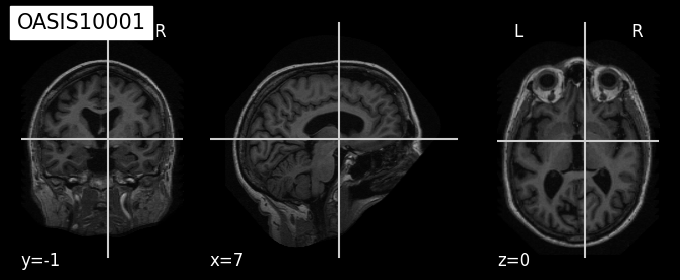

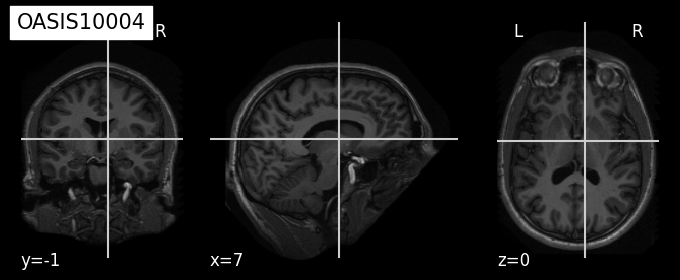

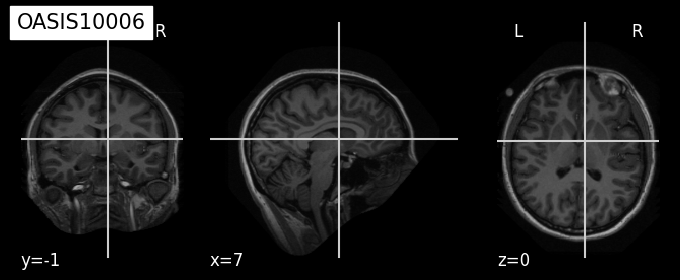

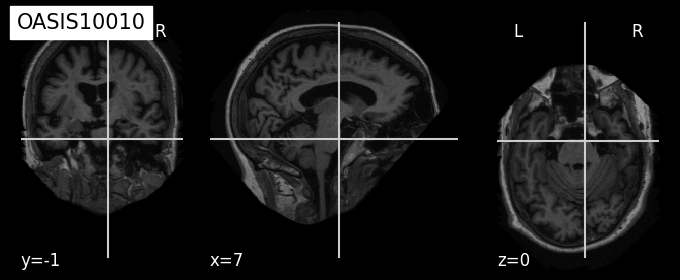

In [57]:
from nilearn.plotting import plot_anat

for subject in ("OASIS10001", "OASIS10004", "OASIS10006", "OASIS10010"):
    plot_anat(f"./data/bids/sub-{subject}/ses-M000/anat/sub-{subject}_ses-M000_T1w.nii.gz", cut_coords=(7, -1, 0), title=subject)

### Step 2: The processing

Once your dataset is in [BIDS](https://bids.neuroimaging.io) format, you usually start with some preprocessing to make the images usable for some later analysis. Such pre-processing steps can for example include defacing, denoising, tissue segmentation, alignment...

Of course, **there is no single tool performing all these steps for all modalities**.

Moreover, there are different consensus in the research community around which tools to use for each step.

#### Example: aligning images on a template

<img src="https://camo.githubusercontent.com/ac30e91e9a09652adaf1fa4c00454a659868b056dc43bc26e3668227fcc80789/687474703a2f2f692e696d6775722e636f6d2f6d4c5a373141692e706e67" width="600" height="200" alt="registration with ants">

For example, we cannot work with the previous images because they contain structures that we are not interrested in like skull or neck.

More importantly, the images are still in native space which means that we won't be able to compare them: a voxel as some given coordinates does not represent the same brain region in the different images.

To solve this problem, we need to **affinely align our T1-weighted MR image to the MNI space**.

To perform this task, we will need to perform the following steps:

##### 1. Download the MNI template 2009c

This could be implemented in a bash or Python script for example. It could also be manually downloaded.

##### 2. Download the reference template

Same thing, this could be implemented as a Bash or Python script.

##### 3. Perform bias correction

The standard solution is to use the [N4BiasFieldCorrection](https://github.com/ANTsX/ANTs/wiki/N4BiasFieldCorrection) command from the [ANTs software](https://sourceforge.net/projects/advants/).

The command looks more or less like this:

```
$ N4BiasFieldCorrection -d 3 -v 1 -s 4 -b [ 180 ] -c [ 50x50x50x50, 0.0 ] -i T1w.nii.gz -o [ corrected_T1w.nii.gz, T1w_BiasField.nii.gz ]
```

##### 4. Perform registration

The standard solution is to use the [RegistrationSynQuick](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.ants.registration.html#registrationsynquick) command from the [ANTs software](https://sourceforge.net/projects/advants/).

The command looks more or less like this:

```
$ antsRegistrationSyNQuick.sh -d 3 -f fixed1.nii -r 32 -m moving1.nii -n 2 -o transform -p d -s 26 -t s
```

##### 5. Crop the warped image

This could again be a Python function relying on neuroimaging libraries like [Nibabel](https://nipy.org/nibabel/) and [Nilearn](https://nilearn.github.io/stable/index.html).

#### The workflow vision

<img src="https://jfrog.com/wp-content/uploads/2023/03/optimizing-the-software-delivery-pipeline-lg.jpg" width="800" height="400" alt="pipeline image">

These steps mix different utilities (Python, ANTs, bash...) ingesting files and producing other files.

Each step may require some inputs which can be the outputs of other steps.

Because of these implicit input/output file dependencies, **these steps are connected in a workflow**.

Now, you *could* run these manually, feeding the generated outputs of each step to the next and managing all the intermediary files yourself.

Of course, this is **error-prone and extremely time-consuming**.

Moreover, some tools require you to pass a lot of parameters whose values may depend on the values of other parameters, or on some properties of the images...

#### Using automation

<img src="https://synergycodes.com/wp-content/uploads/rpa-interface-open-graph.jpg" width="800" height="400" alt="automation chart">

To avoid these issues, people used to wrap these steps in some script using a language like bash or Python.

This is actually **the basic idea behind pipelines in clinica** !

Imagine also that you don't usually provide a single image as input. Most of the time you want to pre-process a full dataset consisting of hundreds or thousands of images. You clearly want to use parallelism here, especially on a computing cluster!

#### Clinica's value

Clinica gives acess to neuroimaging pipelines which have been implemented using the workflow engine [Nipype](https://nipype.readthedocs.io/en/latest/) and we are currently in the process of transitionning Clinica to rely on [Pydra](https://pydra.readthedocs.io/en/latest/) which can be seen as the `v2` of [Nipype](https://nipype.readthedocs.io/en/latest/).

From the pipeline specifications, a computation graph is built in which the different tasks could be pure Python code, shell commands, or calls to third-party executables. An engine then operates on this graph and manages how tasks are run depending on the resources available.

This means that the parallelism is managed by the workflow engine, the user only needs to decide how much resources to allocate to run a given pipeline.

Users can run these pipelines through a command-line interface which requires very few inputs (usually the input and output folders), but still lets you configure to some extent while providing good default values.

These pipelines are the results of years of research and usage in research environments. They were designed to improve robustness and avoid common pitfalls.

The different pipelines of Clinica are accessible through the `clinica run` command:

In [7]:
! clinica run --help

Usage: clinica run [OPTIONS] COMMAND [ARGS]...

  Run pipelines on BIDS and CAPS datasets.

Options:
  -h, --help  Show this message and exit.

Commands:
  pydra-machine-learning-prepare-spatial-svm
                                  Prepare input data for SVM...
  pydra-statistics-volume-correction
                                  Statistical correction of...
  t1-volume-tissue-segmentation   Tissue segmentation, bias...
  deeplearning-prepare-data       (Deprecated) Prepare data generated by...
  dwi-connectome                  Connectome-based processing...
  dwi-dti                         DTI-based processing of DWI...
  dwi-preprocessing-using-phasediff-fmap
                                  Preprocessing of raw DWI...
  dwi-preprocessing-using-t1      Preprocessing of raw DWI...
  machinelearning-classification  Classification based on...
  machinelearning-prepare-spatial-svm
                                  Prepare input data for SVM...
  pet-linear                      Affine

Recall that our objective in this samll example it to perform an affine registration of T1w images to the MNI space.

This is exactly what the [T1Linear](https://aramislab.paris.inria.fr/clinica/docs/public/dev/Pipelines/T1_Linear/) pipeline is doing:

In [8]:
! clinica run t1-linear --help

Usage: clinica run t1-linear [OPTIONS] BIDS_DIRECTORY CAPS_DIRECTORY

  Affine registration of T1w images to the MNI standard space.

  https://aramislab.paris.inria.fr/clinica/docs/public/latest/Pipelines/T1_Lin
  ear/

Options:
  Pipeline-specific options:      Options specific to the pipeline being run
    -ui, --uncropped_image        Do not crop the image with template (cropped
                                  image are suggested for using with DL
                                  models)
    --random_seed INTEGER         Specify the random seed for algorithms that
                                  support it.
  Common pipelines options:       Options common to all Clinica pipelines
    -tsv, --subjects_sessions_tsv FILE
                                  TSV file containing a list of subjects with
                                  their sessions.
    -wd, --working_directory DIRECTORY
                                  Temporary directory to store pipelines
                       

Again, we can see that the command line is very simple, you need to provide the **path to the input folder** which must be in BIDS format and the **path to the output CAPS folder**. Here, we use the `--n_procs` option to run the pipeline on 4 cores since we have 4 images.

The execution of the command will write a lot of information to the console and log files which can be useful for debugging or checking where the execution actually is.

In [58]:
! clinica run t1-linear ./data/bids ./data/caps --n_procs=4

2023-11-29 15:55:59,450:INFO:The pipeline will be run on the following 4 image(s):
2023-11-29 15:55:59,450:INFO:	sub-OASIS10001 | ses-M000,
2023-11-29 15:55:59,450:INFO:	sub-OASIS10004 | ses-M000,
2023-11-29 15:55:59,450:INFO:	sub-OASIS10006 | ses-M000,
2023-11-29 15:55:59,450:INFO:	sub-OASIS10010 | ses-M000,
2023-11-29 15:55:59,450:INFO:The pipeline will last approximately 6 minutes per image.
231129-15:56:04,192 nipype.workflow INFO:
	 [Node] Setting-up "t1-linear.ImageID" in "/private/var/folders/zk/9_vr9pfn69xcvgyvhkj59lpr000z9t/T/tmpay_mg4b3/t1-linear/eaffc385adc28beebe94045e3a49af26f84e949d/ImageID".
231129-15:56:04,193 nipype.workflow INFO:
	 [Node] Setting-up "t1-linear.n4biascorrection" in "/private/var/folders/zk/9_vr9pfn69xcvgyvhkj59lpr000z9t/T/tmpay_mg4b3/t1-linear/eaffc385adc28beebe94045e3a49af26f84e949d/n4biascorrection".
231129-15:56:04,194 nipype.workflow INFO:
	 [Node] Setting-up "t1-linear.ContainerPath" in "/private/var/folders/zk/9_vr9pfn69xcvgyvhkj59lpr000z9t/T/tmp

Let's take a look at the output which is contained in a new CAPS folder:

In [59]:
! tree ./data/caps/

./data/caps/
└── subjects
    ├── sub-OASIS10001
    │   └── ses-M000
    │       └── t1_linear
    │           ├── sub-OASIS10001_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.nii.gz
    │           ├── sub-OASIS10001_ses-M000_space-MNI152NLin2009cSym_res-1x1x1_T1w.nii.gz
    │           └── sub-OASIS10001_ses-M000_space-MNI152NLin2009cSym_res-1x1x1_affine.mat
    ├── sub-OASIS10004
    │   └── ses-M000
    │       └── t1_linear
    │           ├── sub-OASIS10004_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.nii.gz
    │           ├── sub-OASIS10004_ses-M000_space-MNI152NLin2009cSym_res-1x1x1_T1w.nii.gz
    │           └── sub-OASIS10004_ses-M000_space-MNI152NLin2009cSym_res-1x1x1_affine.mat
    ├── sub-OASIS10006
    │   └── ses-M000
    │       └── t1_linear
    │           ├── sub-OASIS10006_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.nii.gz
    │           ├── sub-OASIS10006_ses-M000_space-MNI152NLin2009cSym_res-1x1x1_T1w.nii.gz
    │         

The CAPS folder has a clear strcuture which is very close to the way BIDS represents datasets. Here, the folder contains the pre-processed images with additional files like the transformation matrices used.

We can visualize the pre-processed images to verify that they were properly aligned:

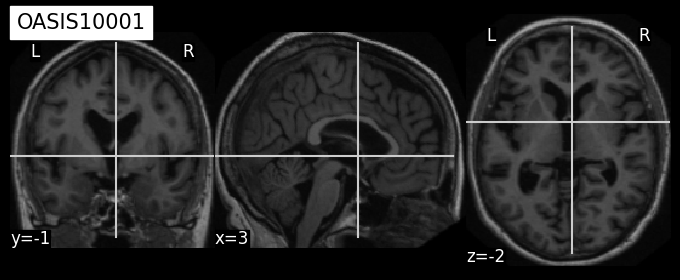

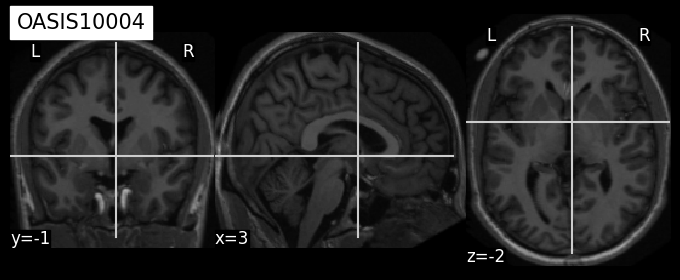

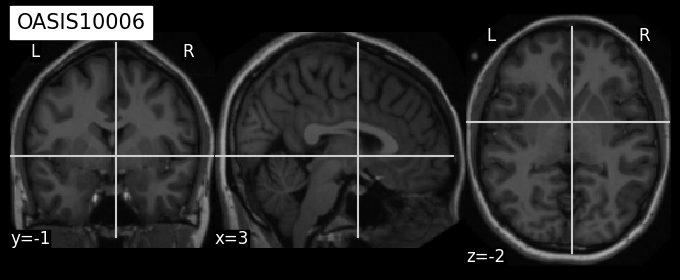

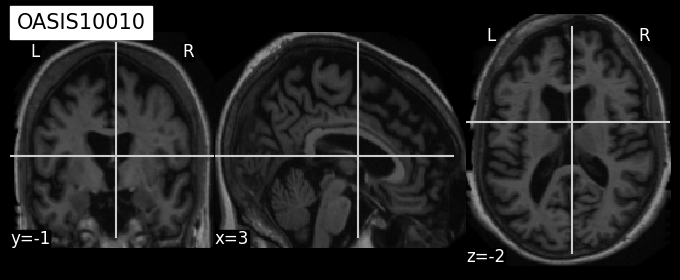

In [60]:
for subject in ("OASIS10001", "OASIS10004", "OASIS10006", "OASIS10010"):
    plot_anat(
        f"./caps/subjects/sub-{subject}/ses-M000/t1_linear/sub-{subject}_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.nii.gz",
        cut_coords=(3, -1, -2),
        title=subject,
    )

### Step 3: The analysis

Let's imagine that we are happy with our pre-processing. Our images are ready to be used for our analysis.

We won't run a full analysis in the context of this small demo since we have a very small number of images, but we will show here how we can use [ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) to help us prepare our data.

### QC our pre-processing

<img src="https://render.fineartamerica.com/images/rendered/search/print/7/8/break/images/artworkimages/medium/2/man-using-a-magnifying-glass-csa-images.jpg" width="200" height="100">

[ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) gives us a pretty handy way to verify that our preprocessing went well. The [quality-check](https://clinicadl.readthedocs.io/en/latest/Preprocessing/QualityCheck/) command relies on a pretrained network that learned to classify images that are adequately registered to a template from others for which the registration failed.

The command is also very simple as you only need to provide the name of the Clinica pipeline which was executed (`t1-linear` in our case), the path to the CAPS output folder of this pipeline, and the path to the output TSV file in which the QC information should be written.

In [61]:
! clinicadl quality-check t1-linear ./data/caps/ qc.tsv --no-gpu

16:00:55 - Downloading quality check model.
16:00:55 - Quality check will be performed over 1 images.
Could not determine if data/caps is a CAPS or BIDS directory. Clinica will assume this is a CAPS directory.
Could not determine if data/caps is a CAPS or BIDS directory. Clinica will assume this is a CAPS directory.
Could not determine if data/caps is a CAPS or BIDS directory. Clinica will assume this is a CAPS directory.
Could not determine if data/caps is a CAPS or BIDS directory. Clinica will assume this is a CAPS directory.
16:01:05 - Results are stored at qc.tsv.


The output of this command is a TSV file in which all the sessions (identified with their `participant_id` and `session_id`) are associated with a pass_probability value and a True/False pass value depending on a chosen threshold.

In our case, we can see that two images passes the QC with a rather high probability while two others fail. This is actually visible on the plots above, especially for the last image.

In [62]:
! cat qc.tsv

participant_id	session_id	pass_probability	pass
sub-OASIS10004	ses-M000	0.9998964071273804	True
sub-OASIS10001	ses-M000	0.9953166246414185	True
sub-OASIS10006	ses-M000	0.362383633852005	False
sub-OASIS10010	ses-M000	0.005501460283994675	False


### Train a deep learning model

At this point, our dataset was divided in half and we have two images for which we are confident that the pre-processing went well.

We now wish to train a model on them. For example, we might want to train a classification model in order to determine whether a subject suffers from Alzeihmer's disease or not.

We won't go as far as training a network here (especially with two images...), but we will show how [ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) can easily help you process your data for training.

Indeed, we cannot feed nifti images to our network since Pytorch networks require a tensor object.

The [prepare-data](https://clinicadl.readthedocs.io/en/latest/Preprocessing/Extract/) command of [ClinicaDL](https://clinicadl.readthedocs.io/en/latest/) will take care of extracting a tensor representation of our images:

In [63]:
! clinicadl prepare-data --help

Usage: clinicadl prepare-data [OPTIONS] COMMAND [ARGS]...

  Extract Pytorch tensors from nifti images.

Options:
  -h, --help  Show this message and exit.

Commands:
  image  Extract image from nifti images.
  slice  Extract slice from nifti images.
  patch  Extract patch from nifti images.
  roi    Extract roi from nifti images.


As you can see, there are various ways to extract tensors from the images. Here, we will simply convert the whole 3D images, but you can apply the extractions to slices, patches, or regions of interests in very simple ways.

In [64]:
! clinicadl prepare-data image ./data/caps/ t1-linear 

16:10:04 - Images will be extracted in Pytorch tensor from 4 images.
16:10:04 - Information for image will be saved in output JSON file and will be used during training for on-the-fly extraction.
Could not determine if data/caps is a CAPS or BIDS directory. Clinica will assume this is a CAPS directory.
16:10:07 - Preprocessing JSON saved at data/caps/tensor_extraction/extract_1701270604.json.


We can see that our CAPS folder was updated with a new `deeplearning_prepare_data` folder:

In [65]:
! tree ./data/caps/

./data/caps/
├── subjects
│   ├── sub-OASIS10001
│   │   └── ses-M000
│   │       ├── deeplearning_prepare_data
│   │       │   └── image_based
│   │       │       └── t1_linear
│   │       │           └── sub-OASIS10001_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.pt
│   │       └── t1_linear
│   │           ├── sub-OASIS10001_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.nii.gz
│   │           ├── sub-OASIS10001_ses-M000_space-MNI152NLin2009cSym_res-1x1x1_T1w.nii.gz
│   │           └── sub-OASIS10001_ses-M000_space-MNI152NLin2009cSym_res-1x1x1_affine.mat
│   ├── sub-OASIS10004
│   │   └── ses-M000
│   │       ├── deeplearning_prepare_data
│   │       │   └── image_based
│   │       │       └── t1_linear
│   │       │           └── sub-OASIS10004_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.pt
│   │       └── t1_linear
│   │           ├── sub-OASIS10004_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.nii.gz
│   │           ├── sub-OASIS1

We can visualize the output tensors:

In [66]:
import torch
import matplotlib.pyplot as plt
from typing import Optional
from pathlib import Path

def plot_tensor(
    tensor: Path | torch.Tensor,
    cut_coords: tuple[int, int, int],
    title: Optional[str] = None,
):
    """Plot a tensor image.

    Parameters
    ----------
    tensor : Path ot torch.Tensor
        The tensor image to be displayed. This can be a path to a ".pt" tensor file,
        or a torch.Tensor object.

    cut_coords : tuple of three ints
        The coordinates of the slice to be displayed.

    title : str, optional
        The title of the plot.
    """
    if not isinstance(tensor, torch.Tensor):
        tensor = torch.load(tensor)
    slice_0 = tensor[0, cut_coords[0], :, :]
    slice_1 = tensor[0, :, cut_coords[1], :]
    slice_2 = tensor[0, :, :, cut_coords[2]]

    _show_slices([slice_0, slice_1, slice_2])

    if title:
        plt.suptitle(title)

    plt.show()

def _show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

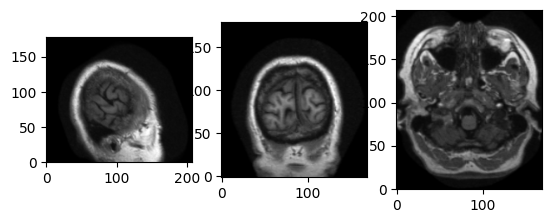

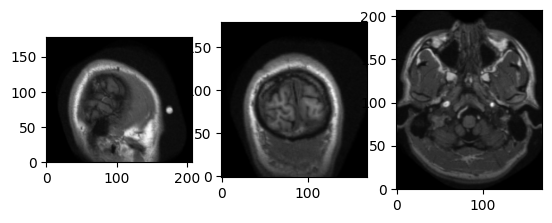

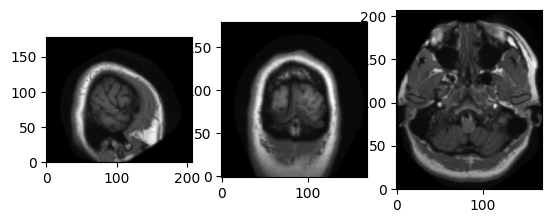

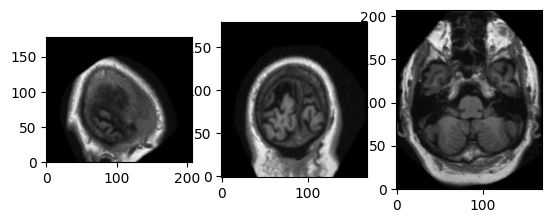

In [67]:
for subject in ("OASIS10001", "OASIS10004", "OASIS10006", "OASIS10010"):
    plot_tensor(
        f"./caps/subjects/sub-{subject}/ses-M000/deeplearning_prepare_data/image_based/t1_linear/"
        f"sub-{subject}_ses-M000_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.pt",
        cut_coords=(15, 20, 15),
    )